# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Counter for the print log
i = 1
# This varaible is used only for developing the code with smaller samples. 
# If needed only 50 cities as example, just add short_cities = cities[0:50]
short_cities = cities
# Creating list to store the data
city_list = []
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]
# a "for" for every city in the list
for city_name in short_cities:
    # Create the URL
    weather_url = f"https://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={weather_api_key}"
    # Request the data for each url
    request_data = requests.get(weather_url).json()
    # Since there is the chance of missing information, we set an if for code ("cod") whereas 200 is positive and 400 negative
    if request_data['cod'] == 200:
        # Store the data on each list
        city_list.append(city_name.capitalize())
        country.append(request_data['sys']['country'])
        date.append(request_data['dt'])
        cloudiness.append(request_data['clouds']['all'])
        humidity.append(request_data['main']['humidity'])
        lat.append(request_data['coord']['lat'])
        lng.append(request_data['coord']['lon'])
        max_temp.append((request_data['main']['temp_max']-273.15)*(9/5)+32)
        wind_speed.append(request_data["wind"]["speed"]*2.237)
        #Print Log
        print(f"Processing record {i} | City: {city_name}")
    else:
        # If there is no data, code = 400, the city name still will be stored but other data will be "".
        city_list.append(city_name)
        # Added a NaN for ease of cleaning data
        country.append(np.nan)
        date.append("")
        cloudiness.append("")
        humidity.append("")
        lat.append("")
        lng.append("")
        max_temp.append("")
        wind_speed.append("")
        #Print log with a NOT FOUND
        print(f"Processing record {i} | !!!CITY NOT FOUND¡¡¡")
          
    i+=1
i=1


Processing record 1 | City: evensk
Processing record 2 | City: bambous virieux
Processing record 3 | City: awjilah
Processing record 4 | City: hirara
Processing record 5 | City: bengkulu
Processing record 6 | City: opuwo
Processing record 7 | City: kavieng
Processing record 8 | City: adrar
Processing record 9 | City: keti bandar
Processing record 10 | City: arraial do cabo
Processing record 11 | City: candido mendes
Processing record 12 | City: cape town
Processing record 13 | City: ushuaia
Processing record 14 | City: kapaa
Processing record 15 | City: saravan
Processing record 16 | City: busselton
Processing record 17 | City: rikitea
Processing record 18 | City: yellowknife
Processing record 19 | City: victor harbor
Processing record 20 | City: puerto ayora
Processing record 21 | !!!CITY NOT FOUND¡¡¡
Processing record 22 | !!!CITY NOT FOUND¡¡¡
Processing record 23 | City: deputatskiy
Processing record 24 | City: vagur
Processing record 25 | City: luz
Processing record 26 | City: suzu

Processing record 209 | City: bonthe
Processing record 210 | City: coquimbo
Processing record 211 | City: lavrentiya
Processing record 212 | City: thompson
Processing record 213 | City: new norfolk
Processing record 214 | City: neuquen
Processing record 215 | City: aksarka
Processing record 216 | City: jizan
Processing record 217 | City: yar-sale
Processing record 218 | City: fortuna
Processing record 219 | City: riberalta
Processing record 220 | City: hofn
Processing record 221 | City: darhan
Processing record 222 | !!!CITY NOT FOUND¡¡¡
Processing record 223 | City: ushumun
Processing record 224 | !!!CITY NOT FOUND¡¡¡
Processing record 225 | !!!CITY NOT FOUND¡¡¡
Processing record 226 | City: lianzhou
Processing record 227 | City: moultrie
Processing record 228 | City: terrasini
Processing record 229 | City: manggar
Processing record 230 | City: kisaran
Processing record 231 | !!!CITY NOT FOUND¡¡¡
Processing record 232 | City: butaritari
Processing record 233 | City: kailua
Processing 

Processing record 416 | City: inongo
Processing record 417 | City: rapid valley
Processing record 418 | City: marawi
Processing record 419 | City: gazojak
Processing record 420 | City: metallostroy
Processing record 421 | City: altay
Processing record 422 | City: ornskoldsvik
Processing record 423 | City: pangody
Processing record 424 | City: saint pete beach
Processing record 425 | City: margate
Processing record 426 | City: progreso
Processing record 427 | City: port lincoln
Processing record 428 | City: san juan
Processing record 429 | City: berezovyy
Processing record 430 | City: geraldton
Processing record 431 | City: maragogi
Processing record 432 | City: gold coast
Processing record 433 | City: adre
Processing record 434 | City: maceio
Processing record 435 | City: nishihara
Processing record 436 | City: orcopampa
Processing record 437 | City: dicabisagan
Processing record 438 | City: namibe
Processing record 439 | City: xining
Processing record 440 | City: concordia
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Creating the DataFrame
weatherdataframe=pd.DataFrame({'City':city_list,
                               'Country':country,
                               'Date':pd.to_datetime(date, unit='s'),
                               'Cloudiness':cloudiness,
                               'Humidity': humidity,
                              'Lat':lat,
                              'Lon':lng,
                              'Max Temp (°F)':max_temp,
                              'Wind Speed (mph)':wind_speed})
# Cleaning NaN
weatherdataframe.dropna(how='any', inplace=True)
# Reseting the index
weatherdataframe.set_index("City", inplace=True)
# Exporting the data into CSV
weatherdataframe.to_csv(output_data_file)
#Displaying the DataFrame
weatherdataframe

,Country,Date,Cloudiness,Humidity,Lat,Lon,Max Temp (°F),Wind Speed (mph)
City,,,,,,,,
Evensk,RU,2020-03-31 16:28:21,45,90,61.95,159.23,3.812,2.97521
Bambous virieux,MU,2020-03-31 16:24:33,75,88,-20.34,57.76,80.6,13.1536
Awjilah,LY,2020-03-31 16:29:41,0,31,29.11,21.29,72.392,18.2539
Hirara,JP,2020-03-31 16:25:48,1,89,24.8,125.28,74.822,5.68198
Bengkulu,ID,2020-03-31 16:27:59,100,79,-3.8,102.27,78.332,1.94619
...,...,...,...,...,...,...,...,...
Chulym,RU,2020-03-31 16:34:10,49,94,55.1,80.96,23.936,6.44256
Ayr,GB,2020-03-31 16:34:11,40,70,55.46,-4.63,51.008,13.8694
Verkhnevilyuysk,RU,2020-03-31 16:34:11,99,96,63.45,120.32,17.006,7.00181


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

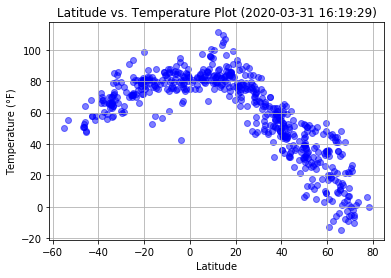

In [41]:
plt_temperature = weatherdataframe["Max Temp (°F)"]
latitude  = weatherdataframe["Lat"]
plt.scatter(latitude, plt_temperature, color="blue", alpha=0.5)
plt.ylabel('Temperature (°F)')
plt.xlabel('Latitude')
plt.title(f"Latitude vs. Temperature Plot ({weatherdataframe['Date'].min()})")
plt.grid(True)
plt.savefig("output_data/Figure1.png")
plt.show()

##### Brief Analysis
* Temperature is directly correlated to the latitude. As we get closer to the **ecuator**, the temperature increases. 
* Also it can be seen that in the southern hemisphere the temperatures are higher than in the northern. This is caused because in the northern hemisphere is spring but just barely out of **winter** and in the southern is fall but just right after **summer**.

#### Latitude vs. Humidity Plot

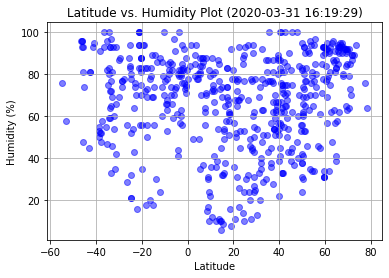

In [35]:
plt_humidity = weatherdataframe["Humidity"]
latitude  = weatherdataframe["Lat"]
plt.scatter(latitude, plt_humidity, color="blue", alpha=0.5)
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title(f"Latitude vs. Humidity Plot ({weatherdataframe['Date'].min()})")
plt.grid(True)
plt.savefig("output_data/Figure2.png")
plt.show()

##### Brief Analysis
* Locations closer to the **Ecuator** seem to have some drier places than the tropics, however there is not a clear tendency of a correlation between latitude and humidity. 
* A better analysis would be how does the humidity correlates with near water masses.

#### Latitude vs. Cloudiness Plot

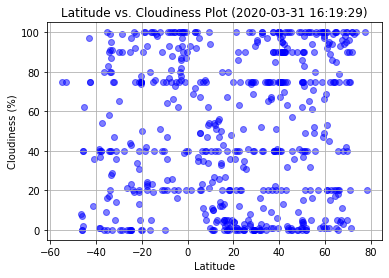

In [36]:
plt_cloudiness = weatherdataframe["Cloudiness"]
latitude  = weatherdataframe["Lat"]
plt.scatter(latitude, plt_cloudiness, color="blue", alpha=0.5)
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title(f"Latitude vs. Cloudiness Plot ({weatherdataframe['Date'].min()})")
plt.grid(True)
plt.savefig("output_data/Figure3.png")
plt.show()

##### Brief Analysis

* This plot shows nearly no correlation between **latitude** and **cloudiness**. Only a small tendency towar the northern tropic with a somewhat clustered area. 
* A deeper analysis may include the rain fall of the season and how it correlates to the cloudiness

#### Latitude vs. Wind speed Plot

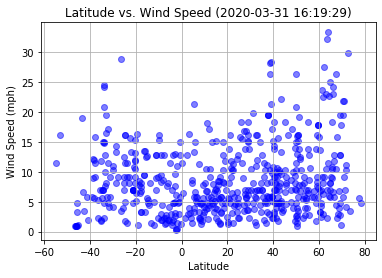

In [37]:
plt_wind_speed = weatherdataframe["Wind Speed (mph)"]
latitude  = weatherdataframe["Lat"]
plt.scatter(latitude, plt_wind_speed, color="blue", alpha=0.5)
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title(f"Latitude vs. Wind Speed ({weatherdataframe['Date'].min()})")
plt.grid(True)
plt.savefig("output_data/Figure4.png")
plt.show()

##### Brief Analysis

* There is a tendecy if increased wind speeds toward higher latitudesbut it is not that representative so to say there is a correlation.

## Linear Regression

In [23]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_reg_n_plot(x_plt_values, y_plt_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_plt_values, y_plt_values)
    regress_values = x_plt_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    if x_plt_values.min() < 0:
        lim_x_annot = x_plt_values.min()/3*2
    else:
        lim_x_annot = x_plt_values.max()/3
    plt.annotate(line_eq,(lim_x_annot,y_plt_values.min()),fontsize=15,color="red")
    plt.scatter(x_plt_values, y_plt_values, color="blue", alpha=0.5)
    
    plt.ylim(y_plt_values.min()-10,y_plt_values.max()+10)
    plt.grid(True)
    plt.xlabel('Latitude')
    print(f'The r-squared is: {rvalue}')

In [24]:
# Create Northern and Southern Hemisphere DataFrames
northern_data = weatherdataframe.loc[weatherdataframe['Lat']>=0]
southern_data = weatherdataframe.loc[weatherdataframe['Lat']<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.903570789710548


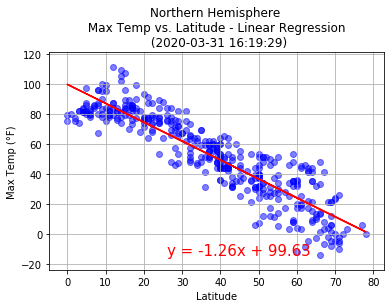

In [47]:
x_values = northern_data['Lat'].astype("int64")
y_values = northern_data['Max Temp (°F)'].astype("int64")
linear_reg_n_plot(x_values, y_values)
plt.title(f"Northern Hemisphere \n Max Temp vs. Latitude - Linear Regression \n ({weatherdataframe['Date'].min()})")
plt.ylabel('Max Temp (°F)')
plt.savefig("output_data/Figure5.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6465143039490046


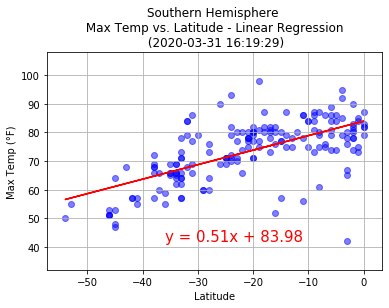

In [48]:
x_values = southern_data['Lat'].astype("int64")
y_values = southern_data['Max Temp (°F)'].astype("int64")
linear_reg_n_plot(x_values, y_values)
plt.title(f"Southern Hemisphere \n Max Temp vs. Latitude - Linear Regression \n ({weatherdataframe['Date'].min()})")
plt.ylabel('Max Temp (°F)')
plt.savefig("output_data/Figure6.png")
plt.show()

##### Brief Analysis

* The linear regression confirms that as we move away from the **ecuator** temperature decreases, however, if compare it to the northern hemiphere, the southern temperatures are higher and the slope is lower, this is caused by the **seasonal effect**.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.299720582801238


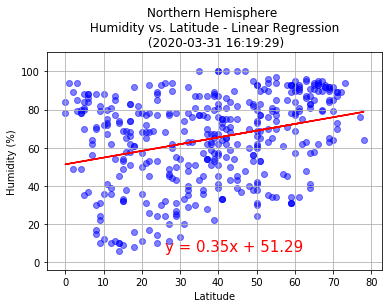

In [49]:
x_values = northern_data['Lat'].astype("int64")
y_values = northern_data['Humidity'].astype("int64")
linear_reg_n_plot(x_values, y_values)
plt.title(f"Northern Hemisphere \n Humidity vs. Latitude - Linear Regression \n ({weatherdataframe['Date'].min()})")
plt.ylabel('Humidity (%)')
plt.savefig("output_data/Figure7.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01859237167278355


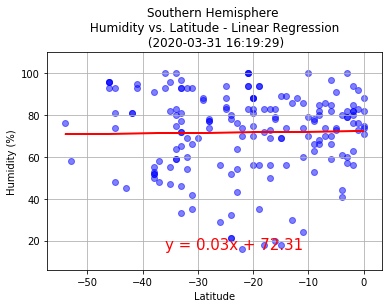

In [50]:
x_values = southern_data['Lat'].astype("int64")
y_values = southern_data['Humidity'].astype("int64")
linear_reg_n_plot(x_values, y_values)
plt.title(f"Southern Hemisphere \n Humidity vs. Latitude - Linear Regression \n ({weatherdataframe['Date'].min()})")
plt.ylabel('Humidity (%)')
plt.savefig("output_data/Figure8.png")
plt.show()

##### Brief Analysis

* Humidity regression shows that the latitude has not much impact on the humidity of a location, except for the northern tropic in which we can se the dryest places. Lets remember that this locations, **the tropics**, is were more desserts are located.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.24054378096250656


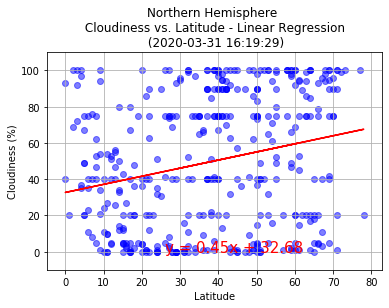

In [51]:
x_values = northern_data['Lat'].astype("int64")
y_values = northern_data['Cloudiness'].astype("int64")
linear_reg_n_plot(x_values, y_values)
plt.title(f"Northern Hemisphere \n Cloudiness vs. Latitude - Linear Regression \n ({weatherdataframe['Date'].min()})")
plt.ylabel('Cloudiness (%)')
plt.savefig("output_data/Figure9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.32167018626318067


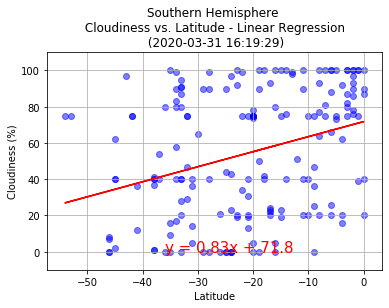

In [52]:
x_values = southern_data['Lat'].astype("int64")
y_values = southern_data['Cloudiness'].astype("int64")
linear_reg_n_plot(x_values, y_values)
plt.title(f"Southern Hemisphere \n Cloudiness vs. Latitude - Linear Regression \n ({weatherdataframe['Date'].min()})")
plt.ylabel('Cloudiness (%)')
plt.savefig("output_data/Figure10.png")
plt.show()

##### Brief Analysis

* As we move north, cloudiness tend to increase based on the regression, however there are no clear clusters in the plot. 
* In **S** latitudes there is less data since there is less continental mass and therfore less data point. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.24614526413955623


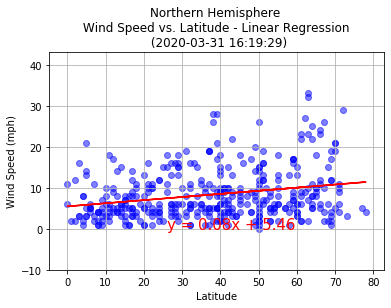

In [53]:
x_values = northern_data['Lat'].astype("int64")
y_values = northern_data['Wind Speed (mph)'].astype("int64")
linear_reg_n_plot(x_values, y_values)
plt.title(f"Northern Hemisphere \n Wind Speed vs. Latitude - Linear Regression \n ({weatherdataframe['Date'].min()})")
plt.ylabel('Wind Speed (mph)')
plt.savefig("output_data/Figure11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.19324058601859248


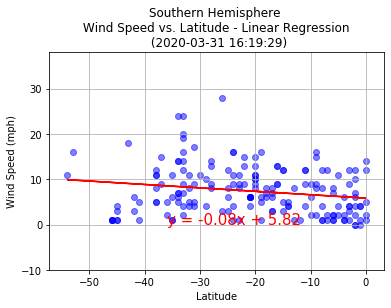

In [54]:
x_values = southern_data['Lat'].astype("int64")
y_values = southern_data['Wind Speed (mph)'].astype("int64")
linear_reg_n_plot(x_values, y_values)
plt.title(f"Southern Hemisphere \n Wind Speed vs. Latitude - Linear Regression \n ({weatherdataframe['Date'].min()})")
plt.ylabel('Wind Speed (mph)')
plt.savefig("output_data/Figure12.png")
plt.show()

##### Brief Analysis

* There is a subtle correlation between the latitude and the wind speeds of the locations. This may be caused due to rotational speed of the earth and temperature differences.